In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter


In [2]:
%matplotlib inline
rcParams['figure.figsize']= 5,4
sns.set_style('whitegrid')


In [4]:
df = pd.read_csv(filepath_or_buffer='/Users/ibm/Desktop/Python/General Python/iris.data.csv',header=None,sep=',')
df.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
Model = DBSCAN(eps=0.8,min_samples=19)
print(Model.fit(data))

DBSCAN(eps=0.8, min_samples=19)


In [6]:
outlier_df = pd.DataFrame(data)
print(Counter(Model.labels_))
print(outlier_df[Model.labels_==-1])


Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBScan For Outlier Detection')

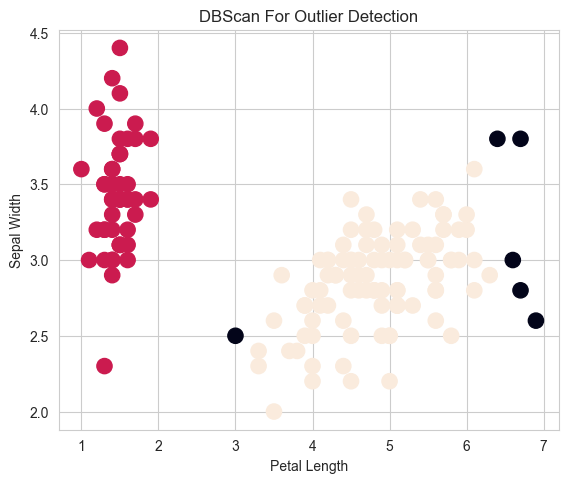

In [8]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = Model.labels_

ax.scatter(data[:,2],data[:,1],c = colors,s = 120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBScan For Outlier Detection')
